# **CliMetLab** 

- **CliMetLab** is Python package to support **AI/ML* activities in climate and meteorology.


- **CliMetLab** allow users to focus on science instead of technical issues such as data access and data formats.

- It is mostly intended to be used in **Jupyter notebooks**, and be interoperable with all popular data analytic packages, such as **NumPy**, **Pandas**, **Xarray**, **SciPy**, **Matplotlib**, etc.

- Datasets are automatically downloaded, cached and transform into standard Python data structures. 

- As well as machine learning frameworks, such as **TensorFlow**, **Keras** or **PyTorch**.

- CliMetLab also provides very **high-level map plotting facilities**. 

In [2]:
import climetlab as cml

d:\ml_train\ml_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Importing GRIB Data from local file

- `GRIB` is a file format for `storage` and ``sharing` of gridded meteorological data. 

- GRIB (GRIdded Binary) is a binary file format  (version 1 and 2) is endorsed by WMO. 

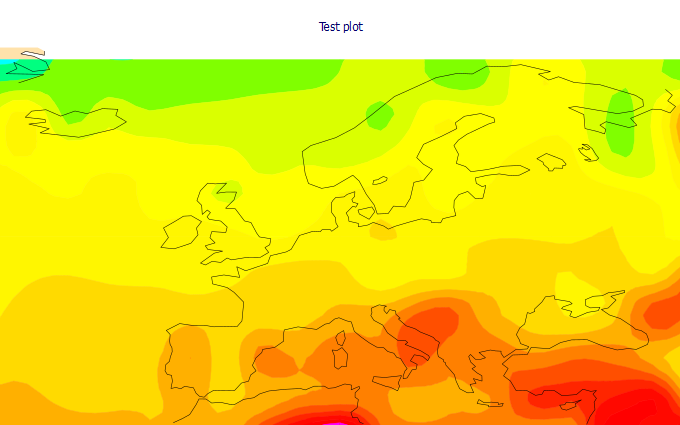

In [37]:
# Load the data
grib_data = cml.load_source("file", "test.grib")
# Plot the data
cml.plot_map(grib_data, title="Test plot")

### 1) Importing NetCDF Data from url

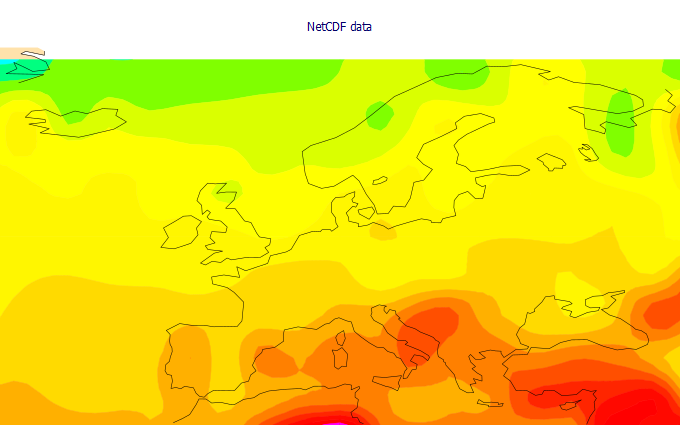

In [35]:
# Load the data
netcdf_url = "https://raw.githubusercontent.com/ecmwf/climetlab/main/docs/examples/test.nc"

# Load the data
netcdf_data = cml.load_source("url", netcdf_url)

# Plot the data
cml.plot_map(netcdf_data,
             title="NetCDF data")

### Convert to xarray

In [38]:
grib_xr = grib_data.to_xarray()
grib_xr

<xarray.Dataset> Size: 2kB
Dimensions:     (number: 1, time: 1, step: 1, surface: 1, latitude: 11,
                 longitude: 19)
Coordinates:
  * number      (number) int32 4B 0
  * time        (time) datetime64[ns] 8B 2020-05-13T12:00:00
  * step        (step) timedelta64[ns] 8B 00:00:00
  * surface     (surface) float64 8B 0.0
  * latitude    (latitude) float64 88B 73.0 69.0 65.0 61.0 ... 41.0 37.0 33.0
  * longitude   (longitude) float64 152B -27.0 -23.0 -19.0 ... 37.0 41.0 45.0
    valid_time  (time, step) datetime64[ns] 8B ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 836B ...
    msl         (number, time, step, surface, latitude, longitude) float32 836B ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-05-26T13:08 GRIB to CDM+CF via cfgrib-0.9.1...

### Export to netCDF

In [39]:
grib_xr.to_netcdf("grib_xr.nc")

### 2) Downloading from an URL in .csv file

-  NOAA's International Best Track Archive for Climate Stewardship (IBTrACS) 

- Convert it to a Pandas frame. 

- The rows corresponding to the severe tropical cyclone Uma are extracted and plotted.

In [41]:

# Define the URL
URL = "https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.SP.list.v04r00.csv"

# Load the data
data = cml.load_source("url", URL)

# Convert the data to a pandas DataFrame
pd = data.to_pandas()

pd.head()

d:\ml_train\ml_env\lib\site-packages\climetlab\readers\csv.py:146: DtypeWarning: Columns (1,2,8,9,14,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  return pandas.read_csv(self.path, **pandas_read_csv_kwargs)


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,,Year,,,,,,,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,1897005S10135,1897,1,SP,EA,NOT_NAMED,1897-01-04 12:00:00,NR,-10.1000,135.300,...,,,,,,,,,9,246
2,1897005S10135,1897,1,SI,WA,NOT_NAMED,1897-01-04 15:00:00,NR,-10.2755,134.902,...,,,,,,,,,8,246
3,1897005S10135,1897,1,SI,WA,NOT_NAMED,1897-01-04 18:00:00,NR,-10.4406,134.523,...,,,,,,,,,8,246
4,1897005S10135,1897,1,SI,WA,NOT_NAMED,1897-01-04 21:00:00,NR,-10.5853,134.182,...,,,,,,,,,7,247


In [43]:
# Filter the data to get the cyclone UMA:VELI
uma = pd[pd.NAME == "UMA:VELI"]
uma.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
48210,1987035S12160,1987,12,SP,MM,UMA:VELI,1987-02-04 00:00:00,TS,-12.4,160.05,...,,,,,,,,,10,112
48211,1987035S12160,1987,12,SP,MM,UMA:VELI,1987-02-04 03:00:00,TS,-12.5908,160.532,...,,,,,,,,,10,111
48212,1987035S12160,1987,12,SP,MM,UMA:VELI,1987-02-04 06:00:00,TS,-12.767,161.012,...,,,,,,,,,10,109
48213,1987035S12160,1987,12,SP,MM,UMA:VELI,1987-02-04 09:00:00,TS,-12.9154,161.485,...,,,,,,,,,9,106
48214,1987035S12160,1987,12,SP,MM,UMA:VELI,1987-02-04 12:00:00,TS,-13.025,161.925,...,,,,,,,,,8,102


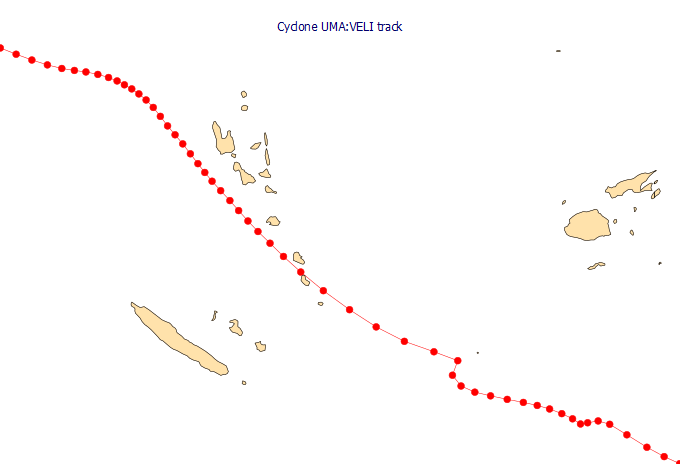

In [46]:
# Plot the cyclone track
cml.plot_map(uma, 
             style="cyclone-track", 
             title="Cyclone UMA:VELI track")

### 3) Retrieve ERA5 data from the CDS


In [56]:
era5_2tm = cml.load_source(
    "cds",
    "reanalysis-era5-single-levels",
    variable=["2t"],
    #year=[2018],
    #month=[1],
    product_type="reanalysis",
    area=[15, 33, 3, 48],
    time="00:00",)

2024-05-26 15:39:31,199 INFO Welcome to the CDS
2024-05-26 15:39:31,204 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-26 15:39:31,407 INFO Request is queued
2024-05-26 15:39:32,622 INFO Request is running
2024-05-26 15:39:34,373 INFO Request is completed
2024-05-26 15:39:34,373 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data1/adaptor.mars.internal-1716727337.654162-31259-5-4e9b800e-58e2-435b-8e19-992bffc3116f.grib to C:\Users\Ymersha\AppData\Local\Temp\climetlab-YMersha\cds-retriever-4e8f02e05db41768fc41e5de2686909a39e884361e820eea42eab9b779ea2a00.cache.tmp (184.2K)
2024-05-26 15:39:35,662 INFO Download rate 142.9K/s


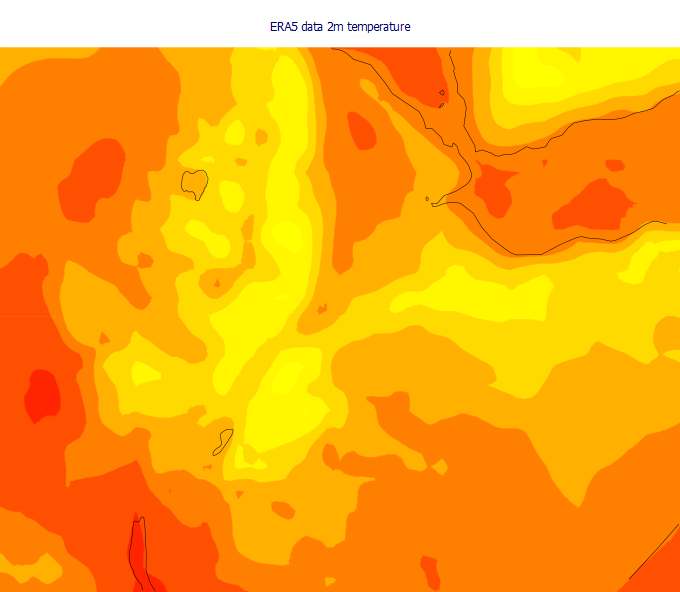

In [63]:
cml.plot_map(era5_2tm[3,:,:], title="ERA5 data 2m temperature")

In [58]:
x = era5_2tm.to_xarray()
x

<xarray.Dataset> Size: 372kB
Dimensions:     (number: 1, time: 31, step: 1, surface: 1, latitude: 49,
                 longitude: 61)
Coordinates:
  * number      (number) int32 4B 0
  * time        (time) datetime64[ns] 248B 2018-01-01 2018-01-02 ... 2018-01-31
  * step        (step) timedelta64[ns] 8B 00:00:00
  * surface     (surface) float64 8B 0.0
  * latitude    (latitude) float64 392B 15.0 14.75 14.5 14.25 ... 3.5 3.25 3.0
  * longitude   (longitude) float64 488B 33.0 33.25 33.5 ... 47.5 47.75 48.0
    valid_time  (time, step) datetime64[ns] 248B ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 371kB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-05-26T15:39 GRIB to CDM+CF via cfgrib-0.9.1...

In [64]:
point = x.t2m.isel(latitude=9, longitude=48) - 273.15
point

<xarray.DataArray 't2m' (number: 1, time: 31, step: 1, surface: 1)> Size: 124B
array([[[[22.821686]],

        [[22.620514]],

        [[23.410309]],

        [[23.097809]],

        [[22.947906]],

        [[22.860504]],

        [[22.829742]],

        [[23.314606]],

        [[23.406647]],

        [[22.886139]],

...

        [[23.237946]],

        [[23.178131]],

        [[23.163727]],

        [[22.658112]],

        [[22.094147]],

        [[22.54776 ]],

        [[22.927155]],

        [[23.484528]],

        [[22.88272 ]],

        [[23.696442]]]], dtype=float32)
Coordinates:
  * number      (number) int32 4B 0
  * time        (time) datetime64[ns] 248B 2018-01-01 2018-01-02 ... 2018-01-31
  * step        (step) timedelta64[ns] 8B 00:00:00
  * surface     (surface) float64 8B 0.0
    latitude    float64 8B 12.75
    longitude   float64 8B 45.0
    valid_time  (time, step) datetime64[ns] 248B ...

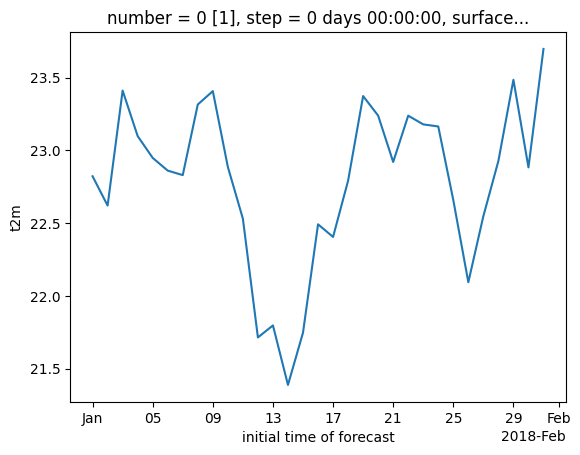

In [65]:
point.plot()

### Machine Learning Example 


In [79]:
# Import the required libraries

from tensorflow.keras.layers import Input, Dense, Flatten

from tensorflow.keras.models import Sequential

### Load the high and low data set

In [86]:
# Loading labeled dataset: High-Low dataset

highlow = cml.load_dataset("high-low")

In [138]:
# Each entry in the dataset consists of a feature field and a label

# Extract the feature field and the label (1st and 3rd fields)
field1, label1 = highlow.fields()[0]

field2, label2 = highlow.fields()[2]

In [139]:
field1, label1

(GribField(z,500,19930408,1200,0,0), (1.0, 0.0, 0.0, 0.0))

In [140]:
field2, label2

(GribField(z,500,19930408,1200,0,0), (0.0, 1.0, 0.0, 0.0))

### Example graphics: Fields with Labels

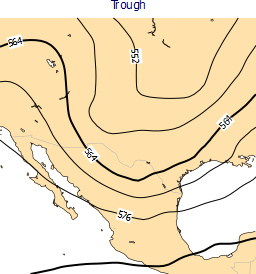

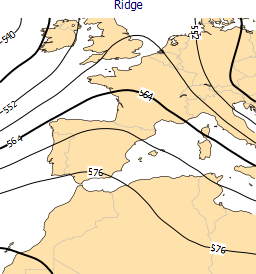

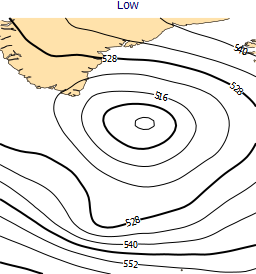

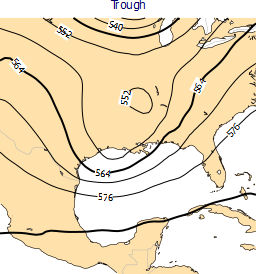

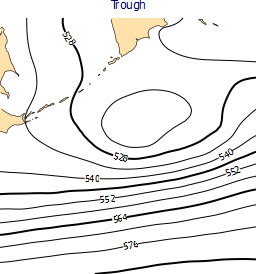

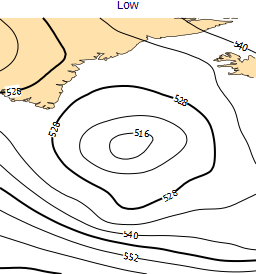

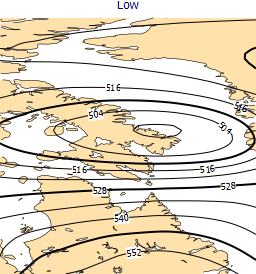

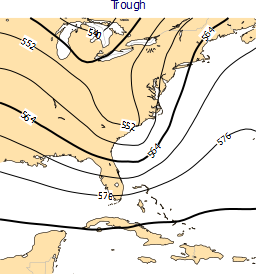

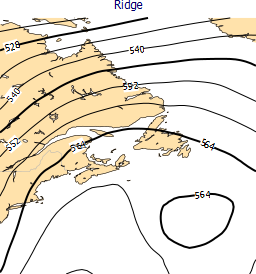

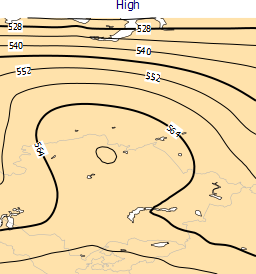

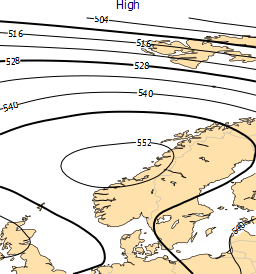

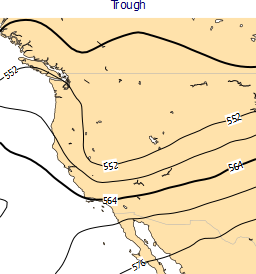

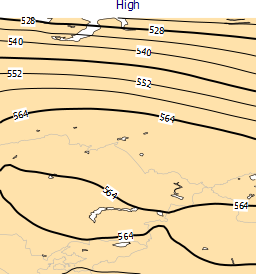

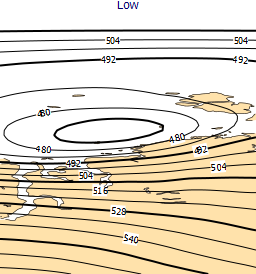

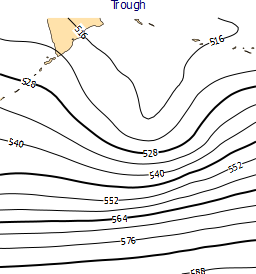

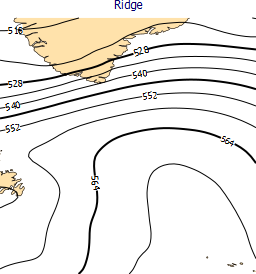

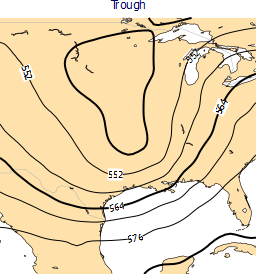

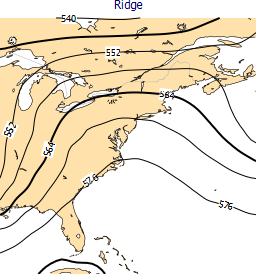

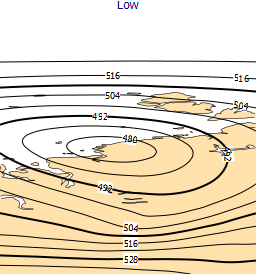

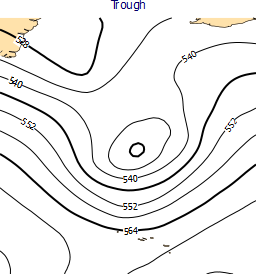

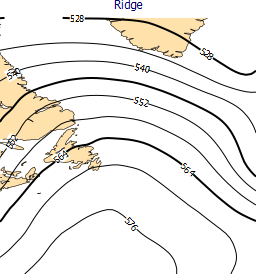

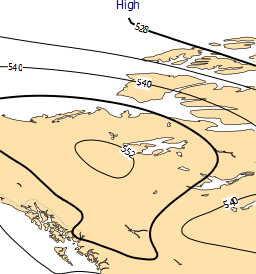

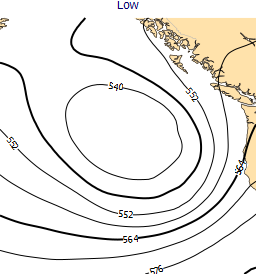

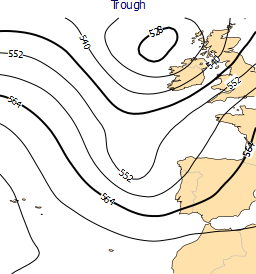

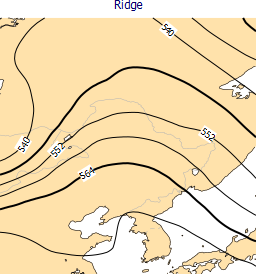

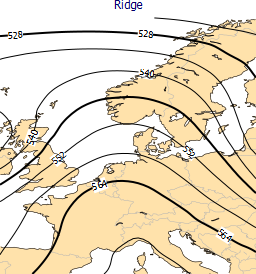

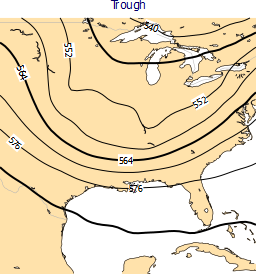

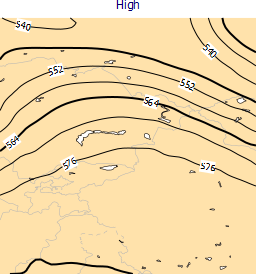

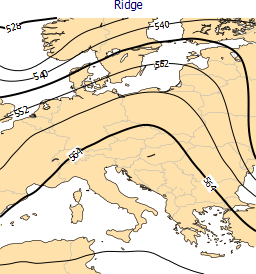

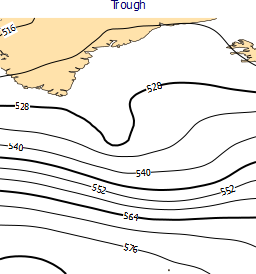

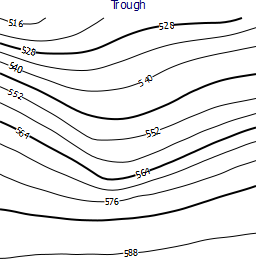

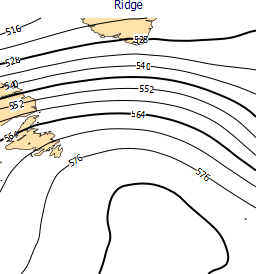

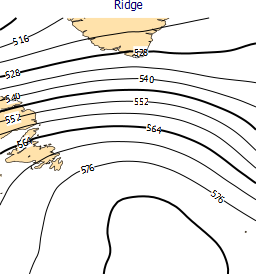

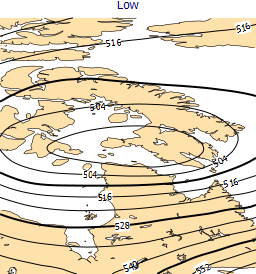

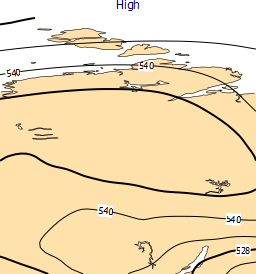

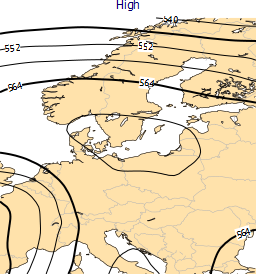

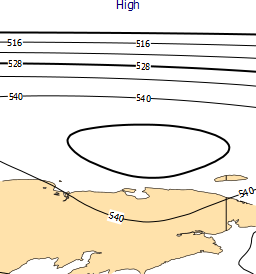

In [87]:
# For each field, create a map plot with a the label.
for field, label in highlow.fields():
    cml.plot_map(field, width=256, title=highlow.title(label))

## Get the train and test sets/split the dataset

In [88]:
(x_train, y_train, f_train), (x_test, y_test, f_test) = highlow.load_data(
    test_size=0.3, fields=True)
# the function should return the fields of the data
# 30% of the data will be used for testing, and the rest for training. 

In [142]:
x_train.shape, y_train.shape, len(f_train)

((25, 21, 21), (25, 4), 25)

In [143]:
x_test.shape, y_test.shape, len(f_test)

((12, 21, 21), (12, 4), 12)

In [147]:
y_train[0:4]

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [141]:
f_train[0:4]

[GribField(z,500,19930409,1200,0,0),
 GribField(z,500,19930409,1200,0,0),
 GribField(z,500,19930421,1200,0,0),
 GribField(z,500,19930412,1200,0,0)]

### Build the model

In [101]:
# creat3 a Sequential model 
model = Sequential()

# add the input layer
#  The model has an input layer with the same shape as the training data
model.add(Input(shape=x_train[0].shape))

# flatten layer to convert the input to a 1D array,
model.add(Flatten())

# add a dense layer with 64 neurons and sigmoid activation function
model.add(Dense(64, activation="sigmoid"))

# add a dense layer with 4 neurons and sigmoid activation function
model.add(Dense(4, activation="softmax"))

### Compile the model

In [102]:
# optimizer = Adam 
# loss = categorical cross-entropy
# metrics = accuracy
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [103]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 441)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        28,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,548 (111.52 KB)

 Trainable params: 28,548 (111.52 KB)

 Non-trainable params: 0 (0.00 B)

None


### Train the model

In [104]:
h = model.fit(x_train, y_train, epochs=100, verbose=0)

### Evaluate the model

In [105]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 1.0000 - loss: 0.1467


[0.14672334492206573, 1.0]

### Using the Model Make Predicted on the Label

In [106]:
predicted = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [156]:
# predicted lable
predicted.argmax(axis=1)

array([2, 0, 2, 0, 2, 3, 0, 0, 3, 1, 2, 0], dtype=int64)

In [157]:
# Actual Label
y_test.argmax(axis=1)

array([2, 0, 2, 0, 2, 3, 0, 0, 3, 1, 2, 0], dtype=int64)

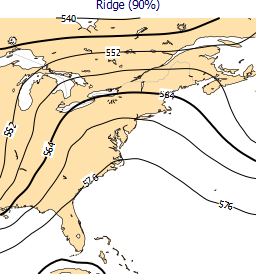

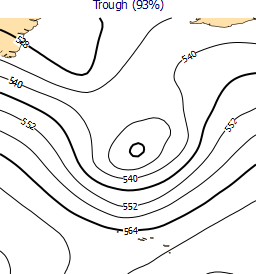

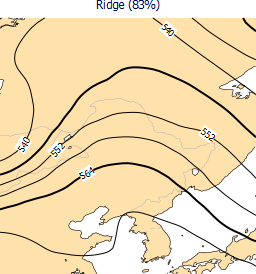

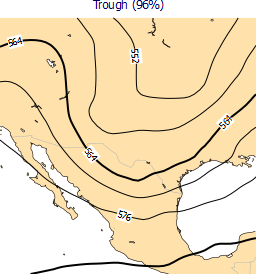

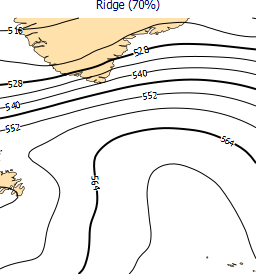

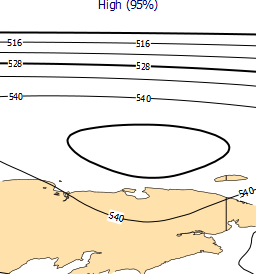

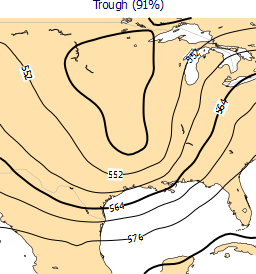

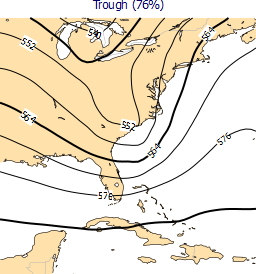

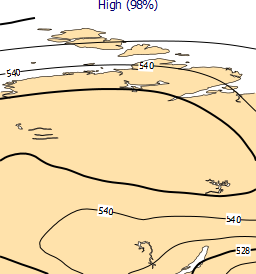

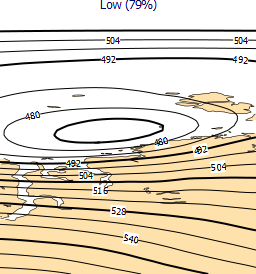

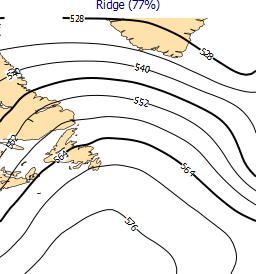

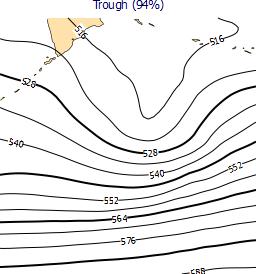

In [107]:
# create a map for each prediction and the corresponding field from the testing data
 
for p, f in zip(predicted, f_test):
    cml.plot_map(f, width=256, title=highlow.title(p))
